In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv


In [2]:
exchange_data = pd.read_csv('/kaggle/input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv')

In [3]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

In [4]:
exchange_data.isnull()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6307,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6308,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6309,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
exchange_data.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

In [6]:


#pd.to_datetime(exchange_rates['Time'])

exchange_data.loc[:, 'Time'] = pd.to_datetime(exchange_data['Time'])

/tmp/ipykernel_20/837103609.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  exchange_data.loc[:, 'Time'] = pd.to_datetime(exchange_data['Time'])


In [7]:
exchange_data.sort_values('Time',inplace = True)

In [8]:
exchange_data.reset_index(drop = True, inplace = True)

In [9]:
exchange_data['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.4030     1
1.4113     1
1.4106     1
1.4127     1
1.0751     1
Name: US_dollar, Length: 3734, dtype: int64

In [10]:
euro_to_dollar = exchange_data[['Time', 'US_dollar']].copy()

In [11]:

euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6306,2023-05-22,1.0822
6307,2023-05-23,1.0779
6308,2023-05-24,1.0785
6309,2023-05-25,1.0735


In [12]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [13]:
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6306,2023-05-22,1.0822
6307,2023-05-23,1.0779
6308,2023-05-24,1.0785
6309,2023-05-25,1.0735


In [14]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)


/tmp/ipykernel_20/1531624325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)


In [15]:
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6306,2023-05-22,1.0822
6307,2023-05-23,1.0779
6308,2023-05-24,1.0785
6309,2023-05-25,1.0735


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

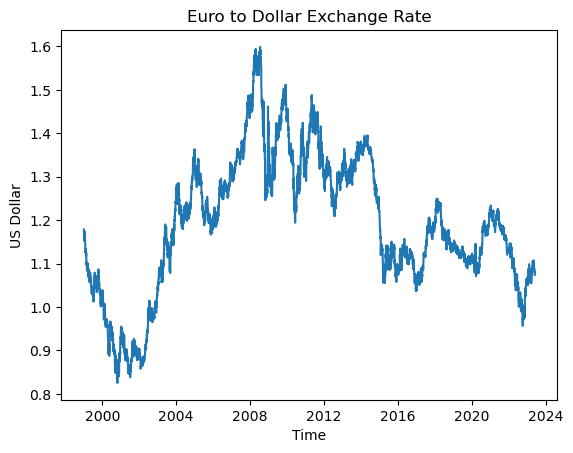

In [17]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.xlabel('Time')
plt.ylabel('US Dollar')
plt.title('Euro to Dollar Exchange Rate');
plt.show()

In [18]:
"""Calculate the rolling means for the US_dollar column using a moving window of 30 days. 
Add the rolling means to a new column named rolling_mean"""

euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar





/tmp/ipykernel_20/3829665884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()


,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6306,2023-05-22,1.0822,1.095337
6307,2023-05-23,1.0779,1.094883
6308,2023-05-24,1.0785,1.094483
6309,2023-05-25,1.0735,1.093860


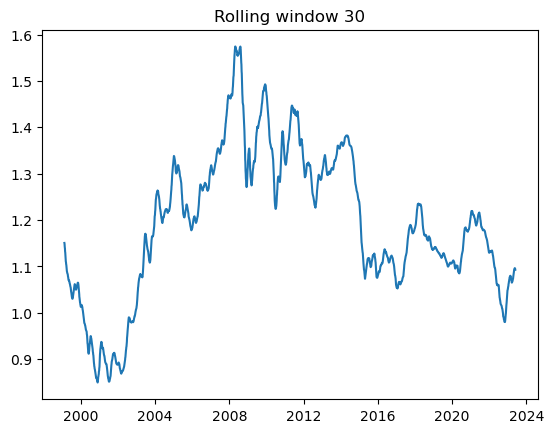

In [19]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.title('Rolling window 30')
plt.show()

In [20]:
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6306,2023-05-22,1.0822,1.095337
6307,2023-05-23,1.0779,1.094883
6308,2023-05-24,1.0785,1.094483
6309,2023-05-25,1.0735,1.093860


In [21]:
before_financial_crisis = euro_to_dollar.copy(
                   )[euro_to_dollar['Time'].dt.year <= 2019]
                   

after_financial_crisis_2020 = euro_to_dollar.copy(
                   )[euro_to_dollar.Time.dt.year >= 2021 ]
                      
                   

In [22]:
before_financial_crisis


,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5432,2019-12-23,1.1075,1.106783
5433,2019-12-24,1.1080,1.107000
5434,2019-12-27,1.1153,1.107490
5435,2019-12-30,1.1189,1.108130


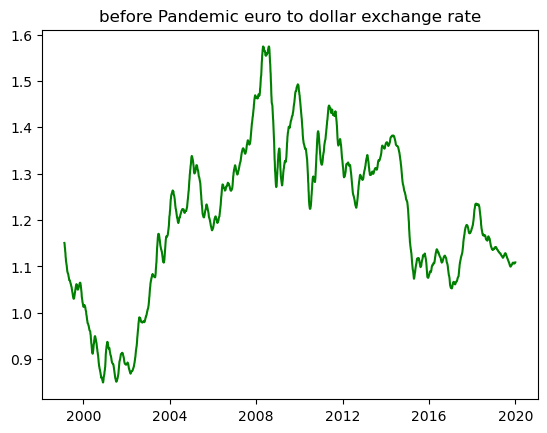

In [23]:
plt.plot(before_financial_crisis['Time'],before_financial_crisis['rolling_mean'],color = 'g')
plt.title('before Pandemic euro to dollar exchange rate')


plt.show()

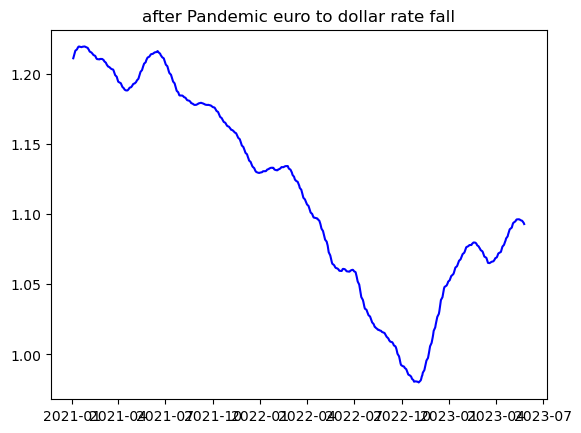

In [24]:
plt.plot(after_financial_crisis_2020['Time'],after_financial_crisis_2020['rolling_mean'],color = 'b')
plt.title('after Pandemic euro to dollar rate fall')
plt.show()

In [25]:
current_euroRate_2023 = euro_to_dollar[euro_to_dollar['Time'].dt.year >= 2023]

In [26]:
current_euroRate_2023

,Time,US_dollar,rolling_mean
6209,2023-01-02,1.0683,1.052953
6210,2023-01-03,1.0545,1.053950
6211,2023-01-04,1.0599,1.055033
6212,2023-01-05,1.0601,1.055953
6213,2023-01-06,1.0500,1.056243
...,...,...,...
6306,2023-05-22,1.0822,1.095337
6307,2023-05-23,1.0779,1.094883
6308,2023-05-24,1.0785,1.094483
6309,2023-05-25,1.0735,1.093860


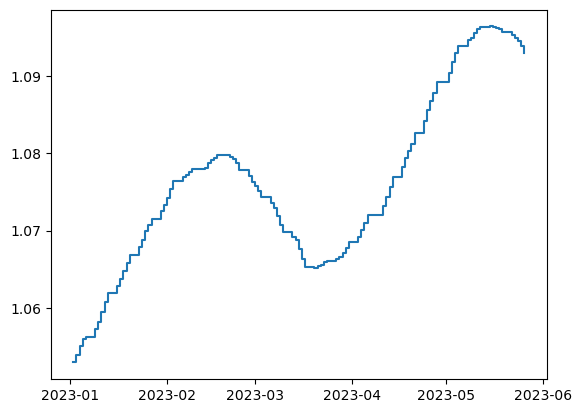

In [27]:
plt.step(current_euroRate_2023['Time'],current_euroRate_2023['rolling_mean'],where='post')

In [28]:
exchange_data_Chinese = exchange_data[['Time','[Chinese yuan renminbi ]']]

In [29]:
exchange_data_Chinese = exchange_data_Chinese[exchange_data_Chinese['[Chinese yuan renminbi ]'] != '-']

In [30]:

exchange_data_Chinese['[Chinese yuan renminbi ]' ] = exchange_data_Chinese['[Chinese yuan renminbi ]' ].astype(float)

In [31]:
exchange_data_Chinese['rolling_mean50'] = exchange_data_Chinese['[Chinese yuan renminbi ]'].rolling(50).mean()

In [32]:
exchng_ChineseYen_Befor2020 = exchange_data_Chinese.copy()[exchange_data['Time'].dt.year < 2020]

exchng_ChineseYen_After2020 = exchange_data_Chinese.copy()[exchange_data_Chinese['Time'].dt.year >= 2020  ]

/tmp/ipykernel_20/3631390929.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exchng_ChineseYen_Befor2020 = exchange_data_Chinese.copy()[exchange_data['Time'].dt.year < 2020]


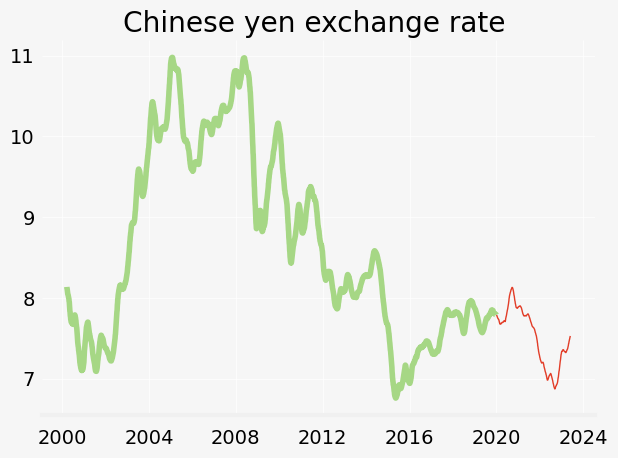

In [33]:

import matplotlib.style as style
style.use('fivethirtyeight')

colors = ['#008fd5', '#fc4f30']

# Create the plot
fig, ax = plt.subplots()
ax.plot(exchng_ChineseYen_Befor2020['Time'], exchng_ChineseYen_Befor2020['rolling_mean50'], color='#A6D785')
ax.plot(exchng_ChineseYen_After2020['Time'], exchng_ChineseYen_After2020['rolling_mean50'], color='#e23d28',linewidth = 1)


# Customize the plot

ax.set_title('Chinese yen exchange rate ')

# Set the background color
fig.patch.set_facecolor('#f6f6f6')
ax.set_facecolor('#f6f6f6')

# Set the grid style
ax.grid(color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust tick parameters
ax.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=5)

# Adjust label alignment
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10

# Show the plot
plt.tight_layout()

# Display the plot
plt.show()


2000 -- The yuan is allowed to close slightly outside the firm end of its 30-basis point band, which is later widened by another 10 points to 8.2760-8.2800 against the dollar.

2001, December -- China joins the World Trade Organisation and pledges to adjust its currency regime gradually.

2003 -- International pressure begins mounting for the yuan to appreciate to help balance global trade, including China’s huge trade surplus with the United States and the rest of the world.

2004, Dec. 8 -- Premier Wen Jiabao says that China would move gradually to a flexible currency regime.

2005, July 21 -- China revalues the yuan by 2.1 percent and revises the rules governing its currency system, saying it had shifted to “a managed floating exchange rate based on market supply and demand with reference to a basket of currencies”.

2008, July -- China’s central bank effectively pegs the yuan against the dollar close to 6.83 to protect China’s economy as it confronted a slowdown due to the global financial crisis.

2009, June -- China said it was going to resume reforming the yuan exchange rate and increase currency flexibility after keeping the yuan tightly linked to the U.S. dollar for nearly two years during and after the global financial crisis.



In [34]:
# Renaming ['Russian rouble'] column into Russian_rouble

exchange_data.rename(columns={'[Russian rouble ]': 'Russian_rouble',
                        
                               }, inplace=True)


exchange_data['Russian_rouble'].value_counts()


-           62
39.6750      4
35.2250      4
43.9800      4
40.6500      4
            ..
34.7170      1
34.6410      1
34.5840      1
34.6900      1
117.2010     1
Name: Russian_rouble, Length: 5705, dtype: int64

In [35]:
euro_Russian_rate = exchange_data[['Time','Russian_rouble']].copy()



In [36]:
euro_Russian_rate = euro_Russian_rate[euro_Russian_rate['Russian_rouble'] != '-']


euro_Russian_rate['Russian_rouble'] = euro_Russian_rate['Russian_rouble'].astype(float)


In [37]:
euro_Russian_rate['rolling_mean'] = euro_Russian_rate.rolling(50).mean()

/tmp/ipykernel_20/1104104892.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Time'], dtype='object')
  euro_Russian_rate['rolling_mean'] = euro_Russian_rate.rolling(50).mean()


In [38]:
euro_Russian_rate

,Time,Russian_rouble,rolling_mean
0,1999-01-04,25.2875,NaN
1,1999-01-05,26.5876,NaN
2,1999-01-06,27.4315,NaN
3,1999-01-07,26.9876,NaN
4,1999-01-08,27.2075,NaN
...,...,...,...
6306,2023-05-22,NaN,NaN
6307,2023-05-23,NaN,NaN
6308,2023-05-24,NaN,NaN
6309,2023-05-25,NaN,NaN


In [39]:
Russian_rouble_MAX = euro_Russian_rate['Russian_rouble'].max()
Russian_rouble_MAX

117.201

In [40]:
Russian_rouble_MIN =euro_Russian_rate['Russian_rouble'].min()
Russian_rouble_MIN

23.1903

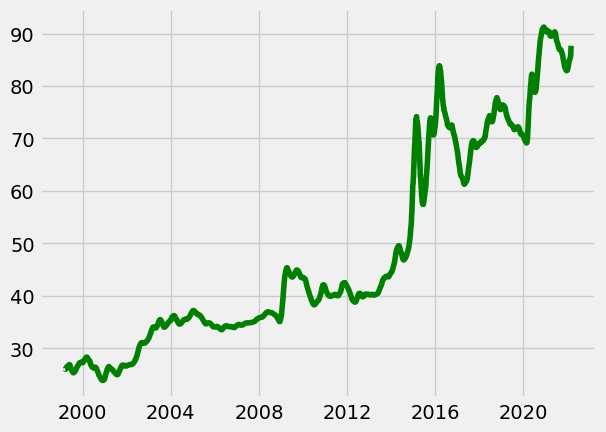

In [41]:
plt.plot(euro_Russian_rate['Time'],euro_Russian_rate['rolling_mean'], color = 'g')

plt.show()

In March 2022, one euro could increasingly buy fewer Russian rubles according to the EUR to RUB exchange rate history. 
Figures have somewhat recovered since. A value of 86.52 ruble per single euro as observed on June 04, 2023 resembled exchange rates found in the mid-2010s. Despite significant drops in 2015 and 2017, the rate grew on average until then. At the end of 2020, one euro could buy roughly 90 Russian rubles - a value that was over twice as high as it was in 2009. Noticeable is the large increase during 2020, amidst the coronavirus pandemic: in the space of three months, the exchange rate grew by roughly 13 Russian rubles. 
Like the euro, the USD to ruble value also declined in February and March 2022.